# Python descriptors - Bài 1: Giao thức và methods

**BS. Lê Ngọc Khả Nhi**

Descriptor là một giao thức lập trình hướng đối tượng (OOP) trong ngôn ngữ Python. Mạnh mẽ và đa dụng, descriptor chính là cơ chế đằng sau của nhiều khái niệm trong OOP như static/class methods, super(), properties ...

Descriptor ít được đề cập trong những giáo trình về OOP cơ bản, một số bài giảng khác lại trình bày về descriptor một cách khó hiểu. Với loạt bài này, Nhi sẽ giới thiệu về descriptor và cách sử dụng nó một cách dễ hiểu nhất có thể. Trong bài đầu tiên, Nhi sẽ trình bày khái quát về cơ chế của một giao thức descriptor, và 4 methods chính của nó.

# Cấu trúc tổng quát của giao thức descriptor

Một giao thức sử dụng descriptor cần ít nhất 2 classes:

+ 1 class là DescriptorClass, bên trong gồm các methods chuyên biệt quy định công dụng/hiệu ứng mà ta cần descriptor này thực thi.

+ 1 class còn lại, tạm gọi là ClientClass, là chủ thể tiêu thụ hay vận dụng tính năng của descriptor, là instance của descriptor class nói trên.

descriptor chỉ đơn giản là instance của một class có chứa một hay nhiều method đặc trưng cho descriptor protocol, bao gồm: 

__ get __, 

__ set __,

__ delete __ 

__ set_name __

descriptor bắt buộc phải được áp dụng như 1 atribute, và ở cấp độ class của ClientClass (thiết lập ngay từ khi xây dựng ClientClass, không phải là attribute của 1 instance client). 

Ngoài ra descriptor attribute này phải nằm ngoài method __ init __

Nội dung code như sau:

In [ ]:
class DescriptorClass:
    ... # Sử dụng ít nhất 1 trong 4 methods chuyên biệt

class ClientClass:
    
    descriptorf __init__(self,...):
        ...
    
    descriptor = DescriptorClass() 
    # descriptor là instance của DescriptorClass, 
    # được gán cho attribute của ClientClass
    
client = ClientClass() # client là 1 object của ClientClass

Khác biệt của descriptor và phép gán attribute thông thường: 

Khi không sử dụng descriptor, ta vẫn có thể gán instance của 1 class A (thí dụ Patient) vào attribute (case) của 1 class B (Database), tuy nhiên khi ta truy nhập vào attribute case trong class B này, ta chỉ nhận được 1 object (instance) của class A; nếu truy nhập sâu hơn nữa thì ta mới lấy được giá trị (properties) của object đó, thí dụ case.group

In [2]:
class Patient:
    group = 'ABC'

class Database:
    case = Patient()
    
pat_db = Database()

print(pat_db.case)

print(pat_db.case.group)

ABC


Trong khi đó, nếu áp dụng 1 descriptor đơn giản nhất với method __ get __ , ta có thể gán cho 1 attribute trong class B ***bất cứ thứ gì ta muốn*** (xuất ra từ method __ get __ ) chứ không chỉ là 1 object cố định.

Tuy đơn giản, thí dụ này cho thấy tiềm năng quan trọng của Descriptor, cho phép điều khiển control flow của chương trình theo bất cứ cách nào ta muốn, và người dùng ở cấp độ client sẽ không hay biết về cơ chế đằng sau (cơ chế này thậm chí còn mạnh hơn decorator hay nested function)

Trong thí dụ sau: Med_record là 1 DescriptorClass, method __ get __ bên trong nó được debug qua hàm print, và return 1 thông điệp : bạn có thể xuất ra bất cứ thứ gì bạn muốn. Sau đó 1 instance của Med_record sẽ được áp dụng để tạo ra attribute có tên là case trong Database

In [3]:
class Med_record:
    
    def __get__(self, instance, owner):
        
        if instance is None:
            return self
        print(f"Gọi method __get__ từ  Descriptor '{self.__class__.__name__}'")
        print(f"instance = {instance}")
        print(f"owner = {owner}")
        
        return 'Bất cứ thứ gì ta muốn'
    
class Database:
    case = Med_record()

Khi tạo 1 instance pat_db của Database class, ta chú ý rằng attribute case chưa hề có trong dictionary của class này (vì nó kg được khởi tạo bằng method __ init __ ):

In [5]:
pat_db = Database()

pat_db.__dict__

{}

Nhưng ta vẫn có thể truy nhập case, và nó xuất ra thông điệp từ descriptor...

In [6]:
pat_db.case

Gọi method __get__ từ  Descriptor 'Med_record'
instance = <__main__.Database object at 0x0000020CAE787B80>
owner = <class '__main__.Database'>


'Bất cứ thứ gì ta muốn'

Bây giờ, ta bắt đầu tìm hiểu về cú pháp và công dụng của 4 descriptor methods nhé:

# Những method của descriptor

## __ get __

Method __ get __ được vận dụng trong DescriptorClass với cú pháp như sau:

In [ ]:
__get__(self, instance, owner)

Vì descriptor là instance của DescriptorClass, tất cả 4 methods đều bắt đầu bằng **self**, self đại diện cho descriptor object.

**instance** là object của ClientClass mà descroptor được gọi (áp dụng), như trong thí dụ trên, instance là pat_db, một object của class Recording;

**owner** chính là ClientClass, trong thí dụ trên, owner là class Recording

bên trong ClientClass, ta áp dụng descriptor có method __ get __ như sau:

In [ ]:
class Descriptor:
    def __get__(self, instance, owner):
        ...
        return something
    
class ClientClass:
    
    attribute = Descriptor()
    
client = ClientClass()

client.attriute # something

Trong thí dụ sau, ta có 1 class Recording với 2 attributes là 2 đoạn tín hiệu xuất ra từ 1 cảm biến, raw chứa dữ liệu trên bệnh nhân, calib chứa dữ liệu cân chỉnh thiết bị. Ta lại có 1 descriptorClass là Calibration, bên trong có method __ get __ , sẽ xuất ra giá trị tín hiệu sau khi cân chỉnh theo công thức: (raw - mean(calib))

In [10]:
import numpy as np

import matplotlib.pyplot as plt

In [7]:
class Calibration:
    
    def __repr__(self):
        return f"descriptor object của DescriptorClass (Calibration)"
    
    def __get__(self, instance, owner):
        
        if instance is None:
            return self
        print(f'''Gọi method __get__ từ  Descriptor '{self.__class__.__name__},
              instance là {instance},
              owner là {owner}''')
        
        calibrated = instance.raw - instance.calib.mean()
        
        print(f"descriptor xuất kết quả calibrated = raw - mean(calib)")
        
        return calibrated
    
class Recording:
    
    def __repr__(self):
        return f'''instance của class {self.__class__.__name__}, 
                   với dữ liệu raw dài {self.raw.shape[0]} 
                   và calib có trung bình = {self.calib.mean():.3f}'''
    
    def __init__(self, 
                 raw: np.array, 
                 calib: np.array):
        
        self.raw = raw
        self.calib = calib
    
    calibrated = Calibration()

Khi truy xuất thuộc tính calibrated từ Recording (ClientClass) thay vì instance của nó, ta sẽ thấy nó gọi 1 descriptor object của DescriptorClass:

In [8]:
Recording.calibrated

descriptor object của DescriptorClass (Calibration)

Khi mới khởi tạo, instance pat_db chỉ chứa 2 attribute là raw và calib, không có calibrated.

In [14]:
pat_db = Recording(raw = np.random.normal(5,1,100),
                   calib = np.random.normal(2,1,20))

pat_db.__dict__

{'raw': array([4.97743809, 4.10391807, 7.3859995 , 4.12615492, 7.15499242,
        5.15917206, 5.80117787, 5.49869014, 5.12723543, 3.98888312,
        4.78806452, 5.97808604, 5.63547677, 5.37902737, 6.79755773,
        4.95073926, 4.48135239, 4.31893478, 3.76857595, 4.86693848,
        4.57128517, 4.76688585, 6.42278784, 6.14796984, 5.20803749,
        5.72520847, 5.63652165, 4.28248262, 4.2983135 , 5.87082892,
        6.66590535, 4.93598307, 4.86281877, 5.13902701, 6.99744803,
        7.1956045 , 6.05806519, 6.75768824, 6.60912273, 3.73126705,
        3.33063177, 5.11454146, 5.41922244, 3.48259748, 5.20599598,
        4.29460521, 5.18802819, 5.4384406 , 4.77281356, 5.44125908,
        2.79153296, 2.45231884, 5.15436319, 3.63522302, 6.25456293,
        7.11744982, 6.10754785, 2.63385269, 5.47275342, 4.7574672 ,
        5.33044237, 3.72714479, 4.98738393, 5.20241757, 3.89284443,
        4.83378042, 3.89075653, 5.35971865, 5.13563189, 5.65323377,
        4.61527185, 4.45216943, 3.5072476

Khi truy xuất calibrated từ 1 instance của Recording class (ClientClass), method __ get __ được gọi và thi hành chức năng của nó và gán kết quả cho thuộc tính calibrated

In [15]:
pat_db.calibrated

Gọi method __get__ từ  Descriptor 'Calibration,
              instance là instance của class Recording, 
                   với dữ liệu raw dài 100 
                   và calib có trung bình = 1.884,
              owner là <class '__main__.Recording'>
descriptor xuất kết quả calibrated = raw - mean(calib)


array([3.09361245, 2.22009243, 5.50217386, 2.24232928, 5.27116678,
       3.27534642, 3.91735223, 3.6148645 , 3.24340979, 2.10505748,
       2.90423887, 4.0942604 , 3.75165113, 3.49520172, 4.91373209,
       3.06691362, 2.59752675, 2.43510914, 1.88475031, 2.98311284,
       2.68745953, 2.88306021, 4.5389622 , 4.2641442 , 3.32421185,
       3.84138283, 3.75269601, 2.39865698, 2.41448786, 3.98700328,
       4.78207971, 3.05215743, 2.97899312, 3.25520136, 5.11362239,
       5.31177885, 4.17423954, 4.8738626 , 4.72529708, 1.84744141,
       1.44680613, 3.23071582, 3.5353968 , 1.59877183, 3.32217034,
       2.41077956, 3.30420255, 3.55461496, 2.88898791, 3.55743344,
       0.90770732, 0.5684932 , 3.27053755, 1.75139737, 4.37073729,
       5.23362417, 4.22372221, 0.75002705, 3.58892778, 2.87364155,
       3.44661672, 1.84331915, 3.10355829, 3.31859193, 2.00901878,
       2.94995477, 2.00693088, 3.475893  , 3.25180625, 3.76940812,
       2.7314462 , 2.56834379, 1.62342197, 2.57423508, 4.21961

Nhưng calibrated không hề có trong dictionary, nó chỉ được tạo ra khi cần...

In [17]:
pat_db.__dict__

{'raw': array([4.97743809, 4.10391807, 7.3859995 , 4.12615492, 7.15499242,
        5.15917206, 5.80117787, 5.49869014, 5.12723543, 3.98888312,
        4.78806452, 5.97808604, 5.63547677, 5.37902737, 6.79755773,
        4.95073926, 4.48135239, 4.31893478, 3.76857595, 4.86693848,
        4.57128517, 4.76688585, 6.42278784, 6.14796984, 5.20803749,
        5.72520847, 5.63652165, 4.28248262, 4.2983135 , 5.87082892,
        6.66590535, 4.93598307, 4.86281877, 5.13902701, 6.99744803,
        7.1956045 , 6.05806519, 6.75768824, 6.60912273, 3.73126705,
        3.33063177, 5.11454146, 5.41922244, 3.48259748, 5.20599598,
        4.29460521, 5.18802819, 5.4384406 , 4.77281356, 5.44125908,
        2.79153296, 2.45231884, 5.15436319, 3.63522302, 6.25456293,
        7.11744982, 6.10754785, 2.63385269, 5.47275342, 4.7574672 ,
        5.33044237, 3.72714479, 4.98738393, 5.20241757, 3.89284443,
        4.83378042, 3.89075653, 5.35971865, 5.13563189, 5.65323377,
        4.61527185, 4.45216943, 3.5072476

Gọi method __get__ từ  Descriptor 'Calibration,
              instance là instance của class Recording, 
                   với dữ liệu raw dài 100 
                   và calib có trung bình = 1.372,
              owner là <class '__main__.Recording'>
descriptor xuất kết quả calibrated = raw - mean(calib)


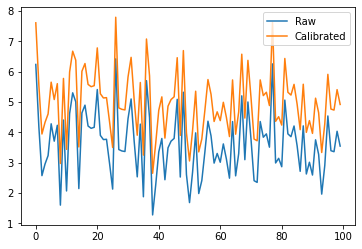

In [11]:
plt.plot(pat_db.calibrated, label = 'Raw')
plt.plot(pat_db.raw, label = 'Calibrated')
plt.legend()
plt.show()

Cẩn thận: Nếu ta gán 1 attribute trùng tên với descriptor, là calibrated, nó sẽ được ghi vào dictionary:

In [20]:
pat_db.calibrated = [1,2,3,4,5]

pat_db.__dict__

{'raw': array([4.97743809, 4.10391807, 7.3859995 , 4.12615492, 7.15499242,
        5.15917206, 5.80117787, 5.49869014, 5.12723543, 3.98888312,
        4.78806452, 5.97808604, 5.63547677, 5.37902737, 6.79755773,
        4.95073926, 4.48135239, 4.31893478, 3.76857595, 4.86693848,
        4.57128517, 4.76688585, 6.42278784, 6.14796984, 5.20803749,
        5.72520847, 5.63652165, 4.28248262, 4.2983135 , 5.87082892,
        6.66590535, 4.93598307, 4.86281877, 5.13902701, 6.99744803,
        7.1956045 , 6.05806519, 6.75768824, 6.60912273, 3.73126705,
        3.33063177, 5.11454146, 5.41922244, 3.48259748, 5.20599598,
        4.29460521, 5.18802819, 5.4384406 , 4.77281356, 5.44125908,
        2.79153296, 2.45231884, 5.15436319, 3.63522302, 6.25456293,
        7.11744982, 6.10754785, 2.63385269, 5.47275342, 4.7574672 ,
        5.33044237, 3.72714479, 4.98738393, 5.20241757, 3.89284443,
        4.83378042, 3.89075653, 5.35971865, 5.13563189, 5.65323377,
        4.61527185, 4.45216943, 3.5072476

Lúc này ta đã xóa descriptor, vì giá trị [1,2,2,4,5] đã ghi chèn lên attribute calibrated.

In [21]:
pat_db.calibrated

[1, 2, 3, 4, 5]

##  __ set __

__ set __ là method thứ 2, nó cho phép gán một nội dung mới, thay đổi nội dung hiện hành của attribute, thông qua descriptor. 

Cú pháp của method __ set __ trong DescriptorClass như sau:

In [ ]:
__set__(self, instance, value)

Ý nghĩa của **self** vẫn như trên, chính là object của DescriptorClass, 

**instance** ở đây là một client object của ClientClass,

**value** là giá trị/nội dung mới mà ta gán / thay thế cho nội dung cũ của atribute đích trong instance.

trên một client object, method __ set __ cho phép ta gán 1 value bất kì vào attribute đích bằng cú pháp:

In [ ]:
client.attribute = value

Trong thí dụ sau, Nhi muốn method __ set __ trong descriptor MinMaxScaler gán bất cứ giá trị mới value nào vào vị trí 'scaled' trong dictionary của pat_db là instance của class Recording:

In [23]:
class MinMaxScaler:
    
    def __get__(self, instance, owner):
        
        print(f'''Gọi method __get__ từ  Descriptor '{self.__class__.__name__},
              instance là {instance},
              owner là {owner}''')
        
        if instance is None:
            return self
        
        X = instance.__dict__['raw']
        
        X_std = (X - X.min()) / (X.max() - X.min())
        X_scaled = X_std * (1 - 0)
        
        return X_scaled
    
    def __set__(self, instance, value):
        
        print(f'''Gọi method __set__ từ  Descriptor '{self.__class__.__name__},
              instance là {instance},
              value là {value}''')
        
        instance.__dict__['scaled'] = value            
    
class Recording:
        
    def __init__(self,
                 raw: np.array,):
        self.raw = raw

    scaled = MinMaxScaler()

Khi mới khởi tạo, object pat_db không có attribute scaled mà chỉ có chuỗi giá trị raw

In [24]:
pat_db = Recording(raw = np.random.normal(5,1,10))

pat_db.__dict__

{'raw': array([3.09299174, 6.3472796 , 4.82339571, 6.09929773, 4.66696783,
        5.21625232, 3.07301279, 3.46794908, 5.17653391, 5.37773044])}

Khi gọi attribute scale, method __ get __ được gọi và xuất ra giá trị scaled

In [25]:
pat_db.scaled

Gọi method __get__ từ  Descriptor 'MinMaxScaler,
              instance là <__main__.Recording object at 0x0000020CD1B99670>,
              owner là <class '__main__.Recording'>


array([0.00610181, 1.        , 0.53458775, 0.92426339, 0.48681281,
       0.65457083, 0.        , 0.12061823, 0.64244035, 0.70388816])

scaled vẫn không có trong dictionary

In [26]:
pat_db.__dict__

{'raw': array([3.09299174, 6.3472796 , 4.82339571, 6.09929773, 4.66696783,
        5.21625232, 3.07301279, 3.46794908, 5.17653391, 5.37773044])}

Bây giờ ta gán 1 giá trị bất kì, thí dụ 'ABC' cho attribute scaled, lúc này method __ set __ được gọi và scaled được lưu vào dictionary:

In [27]:
pat_db.scaled = 'ABC'

pat_db.__dict__

Gọi method __set__ từ  Descriptor 'MinMaxScaler,
              instance là <__main__.Recording object at 0x0000020CD1B99670>,
              value là ABC


{'raw': array([3.09299174, 6.3472796 , 4.82339571, 6.09929773, 4.66696783,
        5.21625232, 3.07301279, 3.46794908, 5.17653391, 5.37773044]),
 'scaled': 'ABC'}

Tuy nhiên, khi ta truy nhập scale lần nữa, method __ get __ được gọi và vẫn xuất ra một chuỗi số là kết quả của min-max scaler, nhưng attribute scaled trong dict thì vẫn là 'ABC'; hành vi kì lạ này chính là thứ phân biệt giữa 2 loại descriptor: data và non-data mà ta sẽ tìm hiểu trong bài tiếp theo. Data descriptor vận dụng method __ set __ và lưu vĩnh viễn giá trị vào dictionary, lúc này nó trở thành dữ liệu.

In [29]:
pat_db.scaled

pat_db.__dict__

Gọi method __get__ từ  Descriptor 'MinMaxScaler,
              instance là <__main__.Recording object at 0x0000020CD1B99670>,
              owner là <class '__main__.Recording'>


{'raw': array([3.09299174, 6.3472796 , 4.82339571, 6.09929773, 4.66696783,
        5.21625232, 3.07301279, 3.46794908, 5.17653391, 5.37773044]),
 'scaled': 'ABC'}

Lưu ý: Như đã thấy ở phần method __ get __ , nếu Descriptor không chứa method __ set __ , khi ta gán 1 value mới vào attribute của client object, value này sẽ vô hiệu hóa descriptor object, do đó ta luôn phải thiết kế Descriptor có method __ set __ , ngay cả khi không cho phép người dùng thay đổi nội dung của attribute mục tiêu:

Thí dụ sau không có có method __ set __ , do đó khi gán giá trị mới vào att, descriptor bị xóa sạch:

In [30]:
class Descriptor:
    
    def __get__(self, instance, owner):
        return 'Giá trị mặc định'
    
class ClientClass:
    
    att = Descriptor()
    
client = ClientClass()

client.att 

'Giá trị mặc định'

In [31]:
client.att = 'Giá trị mới'

client.__dict__

{'att': 'Giá trị mới'}

In [32]:
client.att

'Giá trị mới'

Trái lại trong thí dụ sau, Descriptor có method __ set __ nhưng nó bị khóa, nên ta không thể gán bất cứ giá trị nào thay thế cho descriptor attribute att

In [33]:
class Descriptor:
    
    def __get__(self, instance, owner):
        return 'Giá trị mặc định'
    
    def __set__(self, instance, value):
        print(f"Không cho phép thay đổi giá trị mặc định")
    
class ClientClass:
    
    att = Descriptor()
    
client = ClientClass()

client.att 

'Giá trị mặc định'

In [34]:
client.att = 'Giá trị mới'

client.att

Không cho phép thay đổi giá trị mặc định


'Giá trị mặc định'

## __ delete __ 

Đây là method dễ hiểu và đơn giản, nó cho phép người dùng xóa 1 attribute; cú pháp của method __ delete __ như sau:

In [ ]:
__delete__(self, instance)

Trong đó, self chính là descriptor object của DescriptorClass, còn instance là object của ClientClass.

Cú pháp xóa attribute như sau:

In [ ]:
del client.att

Hành vi của method __ delete __ cũng tương tự như __ set __ , tức là nó sẽ làm thay đổi nội dung attribute bên trong dictionary của object, nhưng method __ get __ vẫn hoạt động độc lập

In [42]:
class MinMaxScaler:
    
    def __get__(self, instance, owner):
        if instance is None:
            return self
        
        X = instance.__dict__['raw']
        
        X_std = (X - X.min()) / (X.max() - X.min())
        X_scaled = X_std * (1 - 0)
                
        return X_scaled
    
    def __set__(self, instance, value):
        print('Không cho phép ghi chèn dữ liệu')
        
    def __delete__(self, instance):
        print(f"Xóa dữ liệu scaled")
        instance.__dict__['scaled'] = None

class Recording:
        
    def __init__(self,
                 raw: np.array,
                 calib: np.array):
        self.raw = raw
        self.calib = calib

    scaled = MinMaxScaler()
    calibrated = Calibration()

In [36]:
pat_db = Recording(np.random.normal(5,1,10), 
                   np.random.normal(1,2,10))

pat_db.__dict__

{'raw': array([3.9375719 , 5.56802556, 3.6744827 , 5.63525472, 5.96129558,
        6.12168467, 5.60918319, 5.73084226, 5.34231263, 5.34993042]),
 'calib': array([ 0.84248585,  1.23345815,  1.44826357,  2.18860041,  6.55191981,
        -0.72197297,  0.90676786, -2.15422452,  1.65935262, -0.51715315])}

In [37]:
pat_db.scaled

array([0.10750613, 0.77375831, 0.        , 0.80123016, 0.93446021,
       1.        , 0.79057655, 0.84029009, 0.68152525, 0.6846381 ])

In [38]:
pat_db.__dict__

{'raw': array([3.9375719 , 5.56802556, 3.6744827 , 5.63525472, 5.96129558,
        6.12168467, 5.60918319, 5.73084226, 5.34231263, 5.34993042]),
 'calib': array([ 0.84248585,  1.23345815,  1.44826357,  2.18860041,  6.55191981,
        -0.72197297,  0.90676786, -2.15422452,  1.65935262, -0.51715315])}

In [39]:
del pat_db.scaled

Xóa dữ liệu scaled


In [40]:
pat_db.__dict__

{'raw': array([3.9375719 , 5.56802556, 3.6744827 , 5.63525472, 5.96129558,
        6.12168467, 5.60918319, 5.73084226, 5.34231263, 5.34993042]),
 'calib': array([ 0.84248585,  1.23345815,  1.44826357,  2.18860041,  6.55191981,
        -0.72197297,  0.90676786, -2.15422452,  1.65935262, -0.51715315]),
 'scaled': None}

In [41]:
pat_db.scaled

array([0.10750613, 0.77375831, 0.        , 0.80123016, 0.93446021,
       1.        , 0.79057655, 0.84029009, 0.68152525, 0.6846381 ])

## __ set_name __

Đây là method sau cùng và tương đối mới (từ Python 3.6), với cú pháp:

In [ ]:
__set_name__(self, owner, name)

self là descriptor object, owner là ClientClass, 

name là tên của attribute mà ta cần ghi vào client object như 1 key của client.__ dict __ ; đồng thời sử dụng trong các method __ get __ và __ set __. 

Ở những phiên bản trước 3.6, descriptor không có khả năng tiếp nhận tự động một tên attribute bất kì, thuộc tính descriptor.name phải được khai báo thông qua method __ init __ . 

Từ khi có method __ set_name __ , đã tăng tính linh hoạt cho descriptor.

Trong thí dụ sau, nhờ có method __ set_name __ , ta có thể áp dụng cùng Descriptor class Standardisation để hoán chuyển cho lần lượt 2 attribute khác nhau là x1 và x2 trong class Recording:

In [45]:
class Standardization:
    
    def __init__(self, name: str):
        self.name = name
        
    def __set_name__(self, owner, name):
        self.name = name
        
    def __get__(self, instance, owner):
        if instance is None:
            return self
        
        x = instance.__dict__[self.name.split('_')[1]]
        z = (x - x.mean())/x.std()
        
        instance.__dict__[self.name] = z
        
        return z
    
    def __set__(self, instance, value):
        instance.__dict__[self.name] = value
        
class Recording:
        
    def __init__(self,
                 x1: np.array,
                 x2: np.array):
        
        self.x1, self.x2 = x1, x2

    std_x1 = Standardization('x1')
    std_x2 = Standardization('x2')

In [46]:
pat_db = Recording(np.random.normal(5,1,20),
                  np.random.normal(3,6,15),
                  )

pat_db.__dict__

{'x1': array([5.47354059, 2.09641744, 4.64445358, 4.98131638, 5.91798775,
        4.0786058 , 4.37859828, 4.87039082, 5.05737418, 3.89128276,
        6.17196401, 5.22163973, 3.30112695, 5.57456072, 5.26994654,
        5.46541731, 5.31943393, 4.19086568, 3.71169672, 5.73449963]),
 'x2': array([  5.63539936,  -0.06079018,   7.96379551,  15.78551342,
         -0.59369662,   0.37103695,   3.76147336, -11.92124543,
         -3.37750475,  -5.94271067,  -4.21497896,   4.9942185 ,
         -7.19990878,   9.0098196 ,   3.89687313])}

In [47]:
pat_db.std_x1

array([ 0.72599491, -2.74684862, -0.12659155,  0.21981922,  1.18303938,
       -0.70847758, -0.39998218,  0.1057496 ,  0.29803278, -0.90111006,
        1.44421428,  0.46695423, -1.5079931 ,  0.82987834,  0.51663025,
        0.71764139,  0.56752029, -0.59303584, -1.08578624,  0.99435051])

In [48]:
pat_db.std_x2

array([ 0.64054484, -0.18340769,  0.97734682,  2.10875655, -0.26049249,
       -0.12094399,  0.36948187, -1.89901986, -0.6631697 , -1.03422616,
       -0.78431016,  0.54779818, -1.21607958,  1.12865397,  0.38906741])

Trong thí dụ trên, Nhi đã thêm tính năng lưu dữ liệu vào dictionary cho method __ get __ , do đó nó chỉ cần thi hành 1 lần, giá trị std_x1 và std_x2 được lưu ngay vào trong dictionary:

In [49]:
pat_db.__dict__

{'x1': array([5.47354059, 2.09641744, 4.64445358, 4.98131638, 5.91798775,
        4.0786058 , 4.37859828, 4.87039082, 5.05737418, 3.89128276,
        6.17196401, 5.22163973, 3.30112695, 5.57456072, 5.26994654,
        5.46541731, 5.31943393, 4.19086568, 3.71169672, 5.73449963]),
 'x2': array([  5.63539936,  -0.06079018,   7.96379551,  15.78551342,
         -0.59369662,   0.37103695,   3.76147336, -11.92124543,
         -3.37750475,  -5.94271067,  -4.21497896,   4.9942185 ,
         -7.19990878,   9.0098196 ,   3.89687313]),
 'std_x1': array([ 0.72599491, -2.74684862, -0.12659155,  0.21981922,  1.18303938,
        -0.70847758, -0.39998218,  0.1057496 ,  0.29803278, -0.90111006,
         1.44421428,  0.46695423, -1.5079931 ,  0.82987834,  0.51663025,
         0.71764139,  0.56752029, -0.59303584, -1.08578624,  0.99435051]),
 'std_x2': array([ 0.64054484, -0.18340769,  0.97734682,  2.10875655, -0.26049249,
        -0.12094399,  0.36948187, -1.89901986, -0.6631697 , -1.03422616,
        -0

Ta có thể gán giá trị mới cho std_x2, vì method __ set __ chưa bị khóa

In [50]:
pat_db.std_x2 = None

pat_db.__dict__

{'x1': array([5.47354059, 2.09641744, 4.64445358, 4.98131638, 5.91798775,
        4.0786058 , 4.37859828, 4.87039082, 5.05737418, 3.89128276,
        6.17196401, 5.22163973, 3.30112695, 5.57456072, 5.26994654,
        5.46541731, 5.31943393, 4.19086568, 3.71169672, 5.73449963]),
 'x2': array([  5.63539936,  -0.06079018,   7.96379551,  15.78551342,
         -0.59369662,   0.37103695,   3.76147336, -11.92124543,
         -3.37750475,  -5.94271067,  -4.21497896,   4.9942185 ,
         -7.19990878,   9.0098196 ,   3.89687313]),
 'std_x1': array([ 0.72599491, -2.74684862, -0.12659155,  0.21981922,  1.18303938,
        -0.70847758, -0.39998218,  0.1057496 ,  0.29803278, -0.90111006,
         1.44421428,  0.46695423, -1.5079931 ,  0.82987834,  0.51663025,
         0.71764139,  0.56752029, -0.59303584, -1.08578624,  0.99435051]),
 'std_x2': None}

Nhưng khi truy nhập std_x2 lần nữa, method __ get __ lại được gọi, và ghi chèn vào giá trị None mà khi nãy ta vừa gán, như vậy trên thực tế, ta không bao giờ có thể thay đổi được std_x2 bằng phép gán.

In [51]:
pat_db.std_x2

array([ 0.64054484, -0.18340769,  0.97734682,  2.10875655, -0.26049249,
       -0.12094399,  0.36948187, -1.89901986, -0.6631697 , -1.03422616,
       -0.78431016,  0.54779818, -1.21607958,  1.12865397,  0.38906741])

In [52]:
pat_db.__dict__

{'x1': array([5.47354059, 2.09641744, 4.64445358, 4.98131638, 5.91798775,
        4.0786058 , 4.37859828, 4.87039082, 5.05737418, 3.89128276,
        6.17196401, 5.22163973, 3.30112695, 5.57456072, 5.26994654,
        5.46541731, 5.31943393, 4.19086568, 3.71169672, 5.73449963]),
 'x2': array([  5.63539936,  -0.06079018,   7.96379551,  15.78551342,
         -0.59369662,   0.37103695,   3.76147336, -11.92124543,
         -3.37750475,  -5.94271067,  -4.21497896,   4.9942185 ,
         -7.19990878,   9.0098196 ,   3.89687313]),
 'std_x1': array([ 0.72599491, -2.74684862, -0.12659155,  0.21981922,  1.18303938,
        -0.70847758, -0.39998218,  0.1057496 ,  0.29803278, -0.90111006,
         1.44421428,  0.46695423, -1.5079931 ,  0.82987834,  0.51663025,
         0.71764139,  0.56752029, -0.59303584, -1.08578624,  0.99435051]),
 'std_x2': array([ 0.64054484, -0.18340769,  0.97734682,  2.10875655, -0.26049249,
        -0.12094399,  0.36948187, -1.89901986, -0.6631697 , -1.03422616,
        -0

Lưu ý: Vẫn có thể sử dụng cả 2 cơ chế: __ init __ với name mặc định và __ set_name __ với name tùy chọn. Như ta thấy: name được sử dụng như key của instance.__ dict __

Bài thực hành đến đây tạm dừng, các bạn đã nắm được các cơ chế tổng quát của descriptor và 4 method của nó. Trong bài tiếp theo ta sẽ tiếp tục tìm hiểu về những ứng dụng của Descriptor.